In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Dataset Load

In [7]:
x_train = pd.read_csv('./data/track1/features/x_train.csv')
x_valid = pd.read_csv('./data/track1/features/x_valid.csv')
x_test = pd.read_csv('./data/track1/features/x_test.csv')
y_train = pd.read_csv('./data/track1/features/y_train.csv')
y_valid = pd.read_csv('./data/track1/features/y_valid.csv')
y_test = pd.read_csv('./data/track1/features/y_test.csv')

### 2. Isolation Forest Outlier Detection

In [8]:
from sklearn.ensemble import IsolationForest

x = x_train.drop(columns=['날짜', 'CODE'], inplace=False)
isf = IsolationForest(n_estimators = 100, random_state = 42, contamination = 0.005)

isf_y_train = isf.fit_predict(x)
isf_y_valid = isf.predict(x_valid.drop(columns=['날짜', 'CODE'], inplace=False))
isf_y_test = isf.predict(x_test.drop(columns=['날짜', 'CODE'], inplace=False))

c:\Users\bkjeo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [9]:
x['isf_y'] = isf_y_train
x['y'] = y_train['Y'] <-2.0
outliers = x.loc[x['isf_y']==-1]
outlier_index = list(outliers.index)
print(x['isf_y'].value_counts())

 1    76115
-1      381
Name: isf_y, dtype: int64


In [10]:
x[x['isf_y'] == -1]['y'].value_counts()

False    316
True      65
Name: y, dtype: int64

In [11]:
x[x['isf_y'] == 1]['y'].value_counts()

False    63391
True     12724
Name: y, dtype: int64

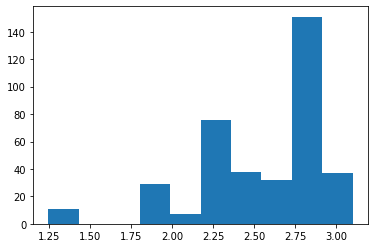

In [14]:
plt.hist(x[x['isf_y'] == -1]['매출액'])

plt.show()

In [15]:
x_train_normal = x_train[isf_y_train == 1]
y_train_normal = y_train[isf_y_train == 1]
x_valid_normal = x_valid[isf_y_valid == 1]
y_valid_normal = y_valid[isf_y_valid == 1]
x_test_normal = x_test[isf_y_test == 1]
y_test_normal = y_test[isf_y_test == 1]

In [20]:
x_train_out = x_train[isf_y_train == -1]
y_train_out = y_train[isf_y_train == -1]
x_valid_out = x_valid[isf_y_valid == -1]
y_valid_out = y_valid[isf_y_valid == -1]
x_test_out = x_test[isf_y_test == -1]
y_test_out = y_test[isf_y_test == -1]

In [16]:
x_train_normal.to_csv('./data/track1/features/x_train_normal.csv', index=False)
x_valid_normal.to_csv('./data/track1/features/x_valid_normal.csv', index=False)
x_test_normal.to_csv('./data/track1/features/x_test_normal.csv', index=False)
y_train_normal.to_csv('./data/track1/features/y_train_normal.csv', index=False)
y_valid_normal.to_csv('./data/track1/features/y_valid_normal.csv', index=False)
y_test_normal.to_csv('./data/track1/features/y_test_normal.csv', index=False)